Diamonds

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading data with diamonds dataset
df = sns.load_dataset("diamonds")

In [ ]:
#Exploring data
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
print(df.tail())

       carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


In [ ]:
print(df.describe(include = "all"))

               carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.0000

The dataset contains 53,940 diamonds with 10 attributes.

**Numerical Columns**
carat (float)
Weight of the diamond.
Range: 0.2 – 5.01
Average: 0.80 carat (most diamonds are small).
Bigger diamonds tend to be rarer.

**depth (float)**
Total depth % of the diamond = (z / mean(x, y)) × 100.
Range: 43% – 79%
Most diamonds cluster around 61–62%.

**table (float)**
Width of the diamond’s top relative to the widest point.
Range: 43 – 95
Average ~ 57%.

**price (int)**
Price in USD.
Range: $326 – $18,823
Average ~ $3,933, but very spread out (high standard deviation).

**x, y, z (float)**

Length, width, and depth (in mm).
Normally between 3 mm – 10 mm, but dataset has some suspicious 0 values (probably data entry errors → needs cleaning).




**Categorical Columns**

**cut (quality of cut, 5 levels)**
Categories: Fair, Good, Very Good, Premium, Ideal
Most common: Ideal (21,551 diamonds).

**color **(diamond color, from best D to worst J → 7 levels)
Most common: G (11,292 diamonds).

**clarity** (clarity of the diamond, 8 levels)
From worst: I1 → to best: IF (Internally Flawless).
Most common: SI1 (13,065 diamonds).

In [ ]:
#Data Cleaning
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df.duplicated().sum()   #np.int64 is just NumPy’s 64-bit integer data type.

#It’s the same as saying “146”, but wrapped in NumPy’s integer type.
#There are 146 duplicate rows in your dataset.

np.int64(146)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

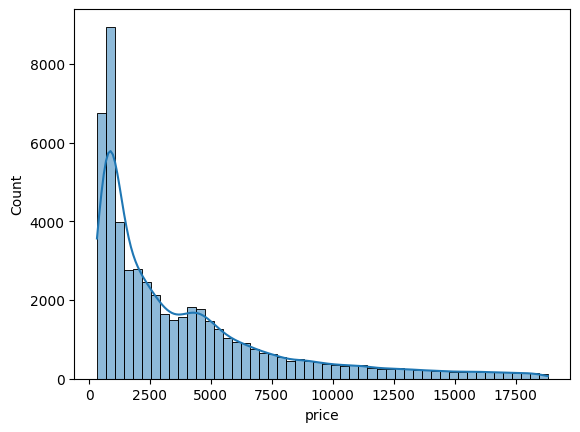

In [ ]:
#Univariate Analysis
#Distribution of diamond prices
sns.histplot(df["price"], bins = 50, kde = True)
plt.show()

**Most diamonds in the dataset are affordable (under $5,000). Only a small number of diamonds are extremely expensive (over $15,000). The distribution is right-skewed because of these rare high-price diamonds.**

bins=50 is a good balance: enough detail to see the shape of distribution, but not overwhelming.

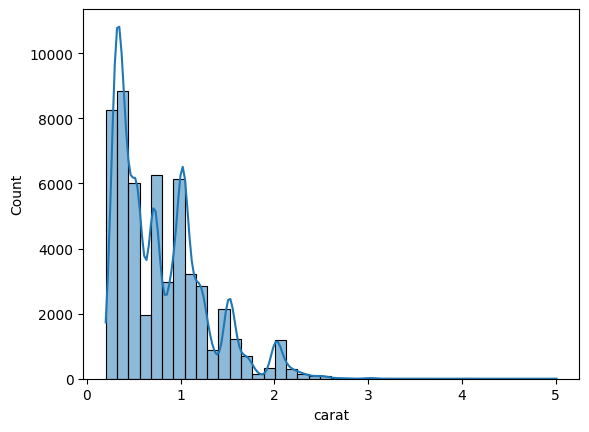

In [ ]:
#Distribution of carat
sns.histplot(df["carat"], bins=40, kde=True)
plt.show()

Insight: Most diamonds are below 1 carat.

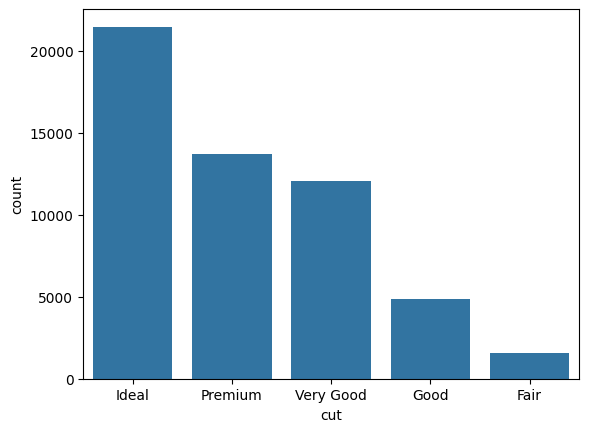

In [ ]:
sns.countplot(data=df, x="cut")
plt.show()

Most diamonds are of Ideal cut → suggests jewelers or dataset collectors prioritize higher quality cuts.

Fair cut diamonds are very rare → could mean they are less desirable or less often sold.

Distribution is not balanced → there’s a strong skew toward better cuts.

The majority of diamonds in the dataset are of Ideal cut, followed by Premium and Very Good. Fair cut diamonds are the least represented. This suggests that better-cut diamonds dominate the market, possibly due to higher demand or data collection bias toward quality diamonds.

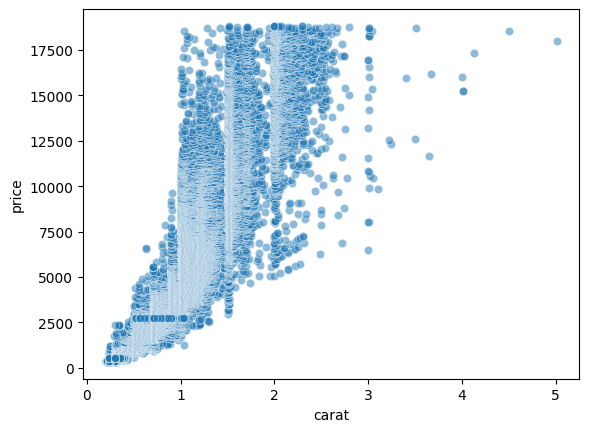

In [ ]:
#Bivariate Analysis
#Carat vs Price
sns.scatterplot(data=df, x="carat", y="price", alpha=0.5)
plt.show()

Strong positive relationship — larger carat → higher price.

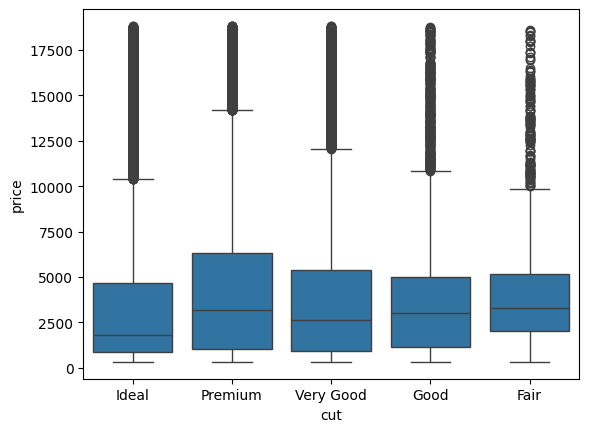

In [ ]:
#Price by Cut:
sns.boxplot(data=df, x="cut", y="price")
plt.show()

Premium/Ideal cuts generally cost more, but variability is high.

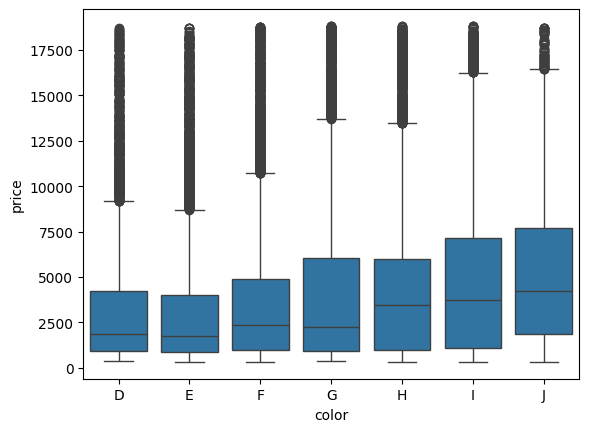

In [ ]:
#Price by Color
sns.boxplot(data=df, x="color", y="price")
plt.show()

Insight: Higher color grade (closer to D) tends to cost more.

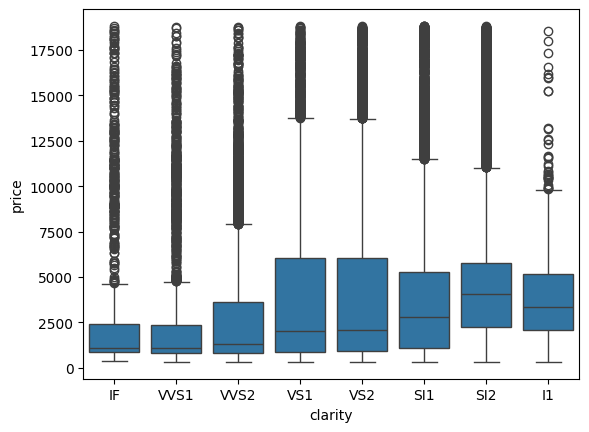

In [ ]:
#Price by Clarity
sns.boxplot(data=df, x="clarity", y="price")
plt.show()

Insight: Flawless (IF, VVS1) diamonds are pricier than lower grades (SI2, I1).

Column	Meaning
x	Length of the diamond (mm) – the longest side of the table/top surface.
y	Width of the diamond (mm) – perpendicular to length, width of the table/top surface.
z	Depth of the diamond (mm) – height from table to culet (bottom tip).

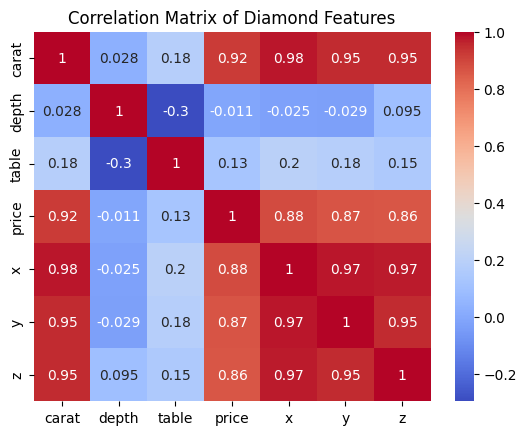

In [ ]:
#Correlation of Numeric Diamond Features
numeric_cols = ["carat","depth","table","price","x","y","z"]
corr = df[numeric_cols].corr()


sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Diamond Features")
plt.show()

The correlation heatmap shows that carat and diamond dimensions (x, y, z) are highly positively correlated with price, meaning larger diamonds are heavier and more expensive. Depth and table percentages have little impact on price. This highlights that size is the primary determinant of a diamond’s cost

In [ ]:
#Statistical Exploration
#Average price by cut, color, clarity:

df.groupby("cut")["price"].mean()

/tmp/ipython-input-3269533722.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cut")["price"].mean()


,price
cut,
Ideal,3462.749953
Premium,4583.501891
Very Good,3981.016157
Good,3919.121039
Fair,4341.954318


Premium cut diamonds are the most expensive on average, suggesting that diamonds with superior cut quality are priced higher. Ideal and Very Good cuts are slightly cheaper on average, while Fair and Good cuts are the least expensive.

In [ ]:
df.groupby("color")["price"].mean()

/tmp/ipython-input-4216459191.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("color")["price"].mean()


,price
color,
D,3174.441007
E,3079.608020
F,3726.749580
G,4001.352069
H,4482.855174
I,5081.751248
J,5326.415418


D and E (high quality) diamonds are more expensive.

Lower quality colors (H–J) have slightly lower prices.
Diamonds with better color grades (D and E) are priced higher on average, indicating that color quality has a noticeable effect on price.”

In [ ]:
df.groupby("clarity")["price"].mean()

/tmp/ipython-input-2862940861.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("clarity")["price"].mean()


,price
clarity,
IF,2870.569507
VVS1,2526.602961
VVS2,3286.532437
VS1,3841.611329
VS2,3927.741516
SI1,3996.165132
SI2,5057.455410
I1,3925.275676


Typical Observation:

Higher clarity diamonds (IF, VVS1) are more expensive.

Lower clarity (SI2, I1) are cheaper.

Insight:

“Diamonds with higher clarity grades are generally more expensive. Price decreases as clarity decreases, confirming that clarity is an important factor in pricing.”

In [ ]:
#Compare mean prices:
pd.pivot_table(df, values="price", index="cut", columns="color")

/tmp/ipython-input-3060999272.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values="price", index="cut", columns="color")


color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2635.239107,2601.217056,3378.721131,3728.445838,3896.114369,4452.125359,4922.871365
Premium,3634.493433,3542.385242,4327.297286,4498.782728,5217.907274,5934.466245,6287.733251
Very Good,3472.662252,3215.471030,3777.724457,3874.210183,4524.835074,5257.477140,5110.304284
Good,3408.107576,3425.748657,3497.254405,4114.074799,4246.585122,5032.471042,4587.833333
Fair,4291.061350,3689.743243,3834.750809,4227.000000,5091.307692,4607.534483,4975.655462


Shows average price for each combination of cut × color.

Helps identify interactions between two categorical variables.

Typical Insights:

Premium cut + D/E color → highest average prices.

Fair cut + J color → lowest average prices.

Some Ideal cut + mid-quality colors may be priced slightly lower than Premium, despite cut quality.

The pivot table shows that price depends on both cut and color. Premium cut diamonds with the best color grades (D, E) command the highest prices. Conversely, lower cut and lower color grades result in the lowest prices. This demonstrates the combined effect of cut and color on diamond pricing

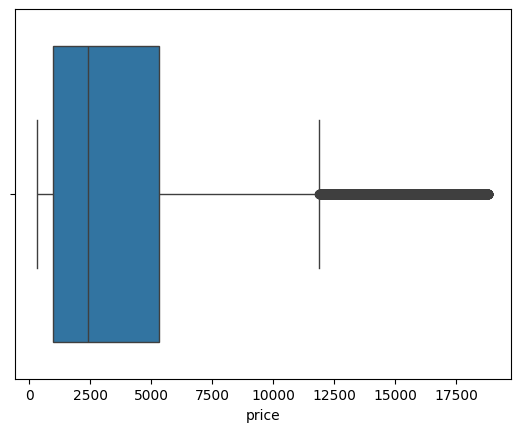

In [ ]:
#Outlier Detection

#Boxplot for price:
sns.boxplot(x=df["price"])
plt.show()


Insight: Diamonds above $15,000 can be considered outliers.

What Are Outliers?

Outliers are data points that are far away from the majority of the data.

They are unusually high or low compared to the rest of the dataset.

Outliers can skew analysis, affect averages, or sometimes indicate errors or rare events.

🔹 Example in Diamonds

In your dataset, most diamonds cost under $5,000.

A few diamonds cost above $15,000.

These are much higher than the bulk of prices, so they are considered outliers.

Why it matters:

Outliers can stretch scales in plots and make trends harder to see.

Sometimes they are legitimate data points (like extremely large diamonds).

Sometimes they may be data errors (e.g., wrong price, zero dimensions).

In [ ]:
Carat weight is the strongest factor affecting price.

Cut, color, and clarity also influence price, but less than carat.

Depth and table have very weak correlation with price.

Premium/Ideal cuts and flawless clarity diamonds demand higher prices.

Most diamonds are small (under 1 carat) and priced below $5,000.

Stop after this

In [ ]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR)]

In [ ]:
outliers.head()  # see the first few outlier rows
outliers.shape

(3523, 10)

In [ ]:
df_clean = df[~((df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR))]

In [ ]:
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_clean.shape)

Original dataset shape: (53794, 10)
Cleaned dataset shape: (50271, 10)


In [ ]:
!pip install jupyter-dash plotly seaborn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
df = sns.load_dataset('diamonds')

In [ ]:
# Remove extreme outliers for cleaner visuals
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR))]

In [ ]:
# Create Dash app
app = Dash(__name__)
server = app.server

In [ ]:
# Layout
app.layout = html.Div([
    html.H1("💎 Diamonds Dashboard", style={'textAlign': 'center'}),

    # Dropdown for filtering by cut
    dcc.Dropdown(
        id='cut-filter',
        options=[{'label': c, 'value': c} for c in df_clean['cut'].unique()],
        value=None,
        placeholder="🔍 Filter by Cut",
        style={'width': '50%', 'margin': 'auto'}
    ),

    dcc.Graph(id='scatter'),
    dcc.Graph(id='histogram'),
    dcc.Graph(id='boxplot'),
    dcc.Graph(id='heatmap'),

    html.H2("📋 Data Table Preview", style={'textAlign': 'center'}),
    html.Div(id='table-div')
])


In [ ]:
# Callbacks
@app.callback(
    [Output('scatter', 'figure'),
     Output('histogram', 'figure'),
     Output('boxplot', 'figure'),
     Output('heatmap', 'figure'),
     Output('table-div', 'children')],
    Input('cut-filter', 'value')
)
def update_dashboard(cut):
    # Filter dataframe
    filtered = df_clean[df_clean['cut'] == cut] if cut else df_clean

    # Scatterplot: carat vs price
    scatter_fig = px.scatter(
        filtered,
        x='carat',
        y='price',
        color=filtered['cut'] if cut is None else None,
        title="💎 Carat vs Price",
        opacity=0.5
    )

    # Histogram: price distribution
    hist_fig = px.histogram(
        filtered,
        x='price',
        nbins=50,
        color=filtered['cut'] if cut is None else None,
        title="📊 Price Distribution"
    )

    # Boxplot: price by cut
    box_fig = px.box(
        filtered,
        x='cut',
        y='price',
        color='cut',
        title="📦 Price by Cut"
    )

    # Heatmap: numeric correlation
    numeric_cols = ["carat","depth","table","price","x","y","z"]
    corr = filtered[numeric_cols].corr()
    heatmap_fig = go.Figure(data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.columns,
        colorscale='RdBu',
        zmin=-1,
        zmax=1
    ))
    heatmap_fig.update_layout(title="Correlation Matrix of Numeric Features")

    # Data table preview (first 10 rows)
    table = html.Table([
        html.Thead(html.Tr([html.Th(col) for col in filtered.columns])),
        html.Tbody([
            html.Tr([html.Td(filtered.iloc[i][col]) for col in filtered.columns])
            for i in range(min(len(filtered), 10))
        ])
    ], style={'margin': 'auto', 'width': '90%'})

    return scatter_fig, hist_fig, box_fig, heatmap_fig, table

# Run inline in Jupyter Notebook
app.run(mode='inline')


<IPython.core.display.Javascript object>